# Getting started
Once FluidSF is installed, you can load the module into Python and run some basic calculations with random data.

In [14]:
import matplotlib_inline.backend_inline
import numpy as np
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

### Create a random 2D velocity field

In [4]:
nx, ny = 100, 100
x = np.linspace(1, nx, nx)
y = np.linspace(1, ny, ny)
U = np.random.rand(nx, ny)
V = np.random.rand(nx, ny)

### Generate the advective velocity structure function

We can generate the advective structure function using the function `generate_structure_functions`. The function returns a dictionary with the all supported structure functions and separation distances in each direction. By default the advective velocity structure functions are calculated and the remaining structure functions are set to `None`. We set the boundary condition to `None` because our random data is non-periodic. If we had periodic data we could set the boundary condition based on the direction of periodicity (i.e. `boundary="periodic-x"` or `boundary="periodic-y"` for 2D data). 

In [28]:
import fluidsf

sf = fluidsf.generate_structure_functions(U, V, x, y, boundary=None)

The keys of the dictionary `sf` are 

- `SF_advection_velocity_dir`: Advective velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_advection_scalar_dir`: Advective scalar structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LL_dir`: Longitudinal second order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LLL_dir`: Longitudinal third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LTT_dir`: Longitudinal-transverse-transverse third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LSS_dir`: Longitudinal-scalar-scalar third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `dir-diffs`: Separation distances in each direction (`dir` = `x`, `y`, `z`).

### Plot the advective velocity structure functions in x and y

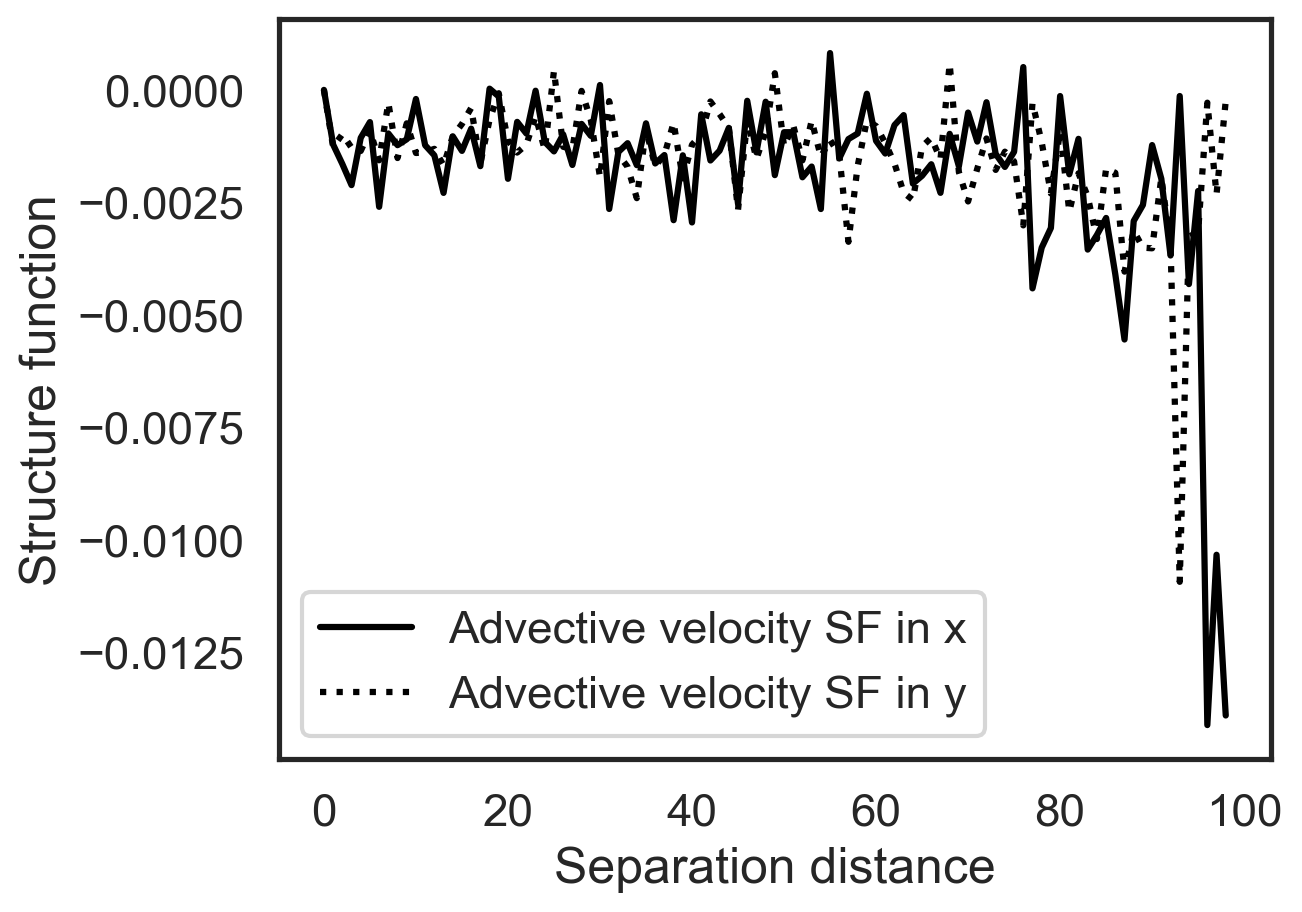

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(sf["x-diffs"], sf["SF_advection_velocity_x"], label="Advective velocity SF in x", color='k')
ax.plot(sf["y-diffs"], sf["SF_advection_velocity_y"], label="Advective velocity SF in y", color='k', linestyle='dotted')
ax.set_xlabel("Separation distance")
ax.set_ylabel("Structure function")
ax.legend()
plt.show()

### Advective scalar structure functions
The advective scalar structure functions can be generated by passing in an argument for a scalar field. The advective velocity structure function is still generated unless you pass the argument `skip_velocity_sf=True`.

In [30]:
S = 2 * np.random.rand(nx, ny)

sf = fluidsf.generate_structure_functions(U, V, x, y, scalar=S, boundary=None,skip_velocity_sf=True)

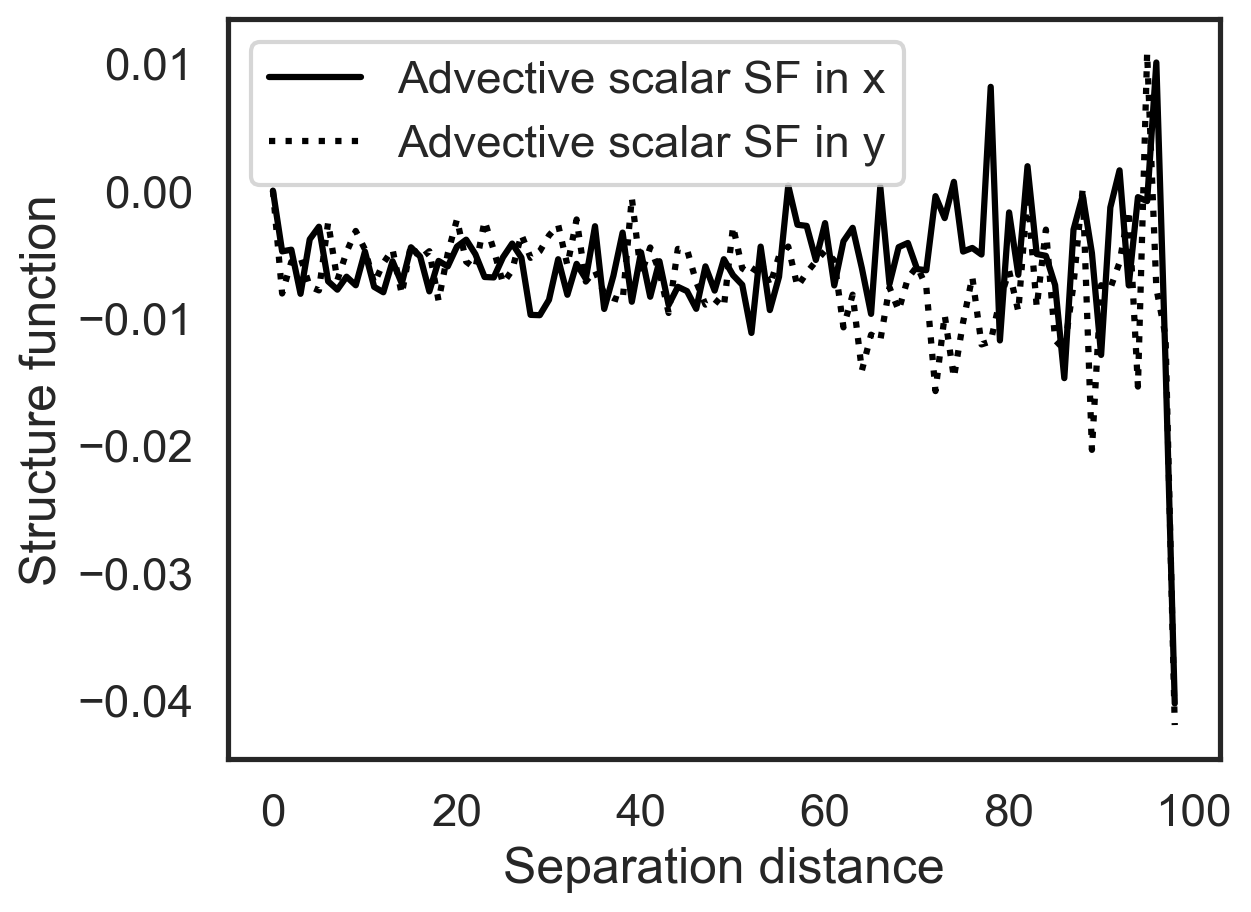

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(sf["x-diffs"], sf["SF_advection_scalar_x"], label="Advective scalar SF in x", color='k')
ax.plot(sf["y-diffs"], sf["SF_advection_scalar_y"], label="Advective scalar SF in y", color='k', linestyle='dotted')
ax.set_xlabel("Separation distance")
ax.set_ylabel("Structure function")
ax.legend()
plt.show()